---
# **I compitino - nov 2022**
---

- Completare le sezioni sottoelencate, scrivendo il codice nelle apposite celle
- Salvare il notebook con nome: `Cognome_Nome_IMMAGINI.ipynb`
- - Caricare il notebook finale sul sito [InfoMM - EI: Compitino 21 Novembre 2022] (a partire da https://upload.di.unimi.it/)
 
NB: possibilmente tutte le visualizzazioni devono avere titolo (eventualmente con parametri variabili inclusi), legende e valori sugli assi. Anche la dimensione delle figure può essere precisato per migliorare il risultato

# Lib and tools



In [8]:
import os, sys
import cv2                        
import matplotlib.pyplot as plt   
import numpy as np                
import os                         
import plotly.express as px       
import plotly.graph_objects as go
from skimage.io import imread
from skimage.color import rgb2lab, rgb2gray
from skimage.util import img_as_ubyte 
from skimage import exposure, color

# dir 
img_dir = '../Immagini_IN/'

# 1. Apri, Converti e Visualizza

- Caricare l'immagine `squirrel.jpg`
- Convertila a livelli di grigio, assicurandoti di avere l'immagine di tipo uint8 (se non lo fosse convertila opportunamente)
- usare la funzione subplot per visualizzare in orizzontale: 
  - l'immagine a colori
  - l'immagine a livelli di grigio
  - l'istogramma dell'immagine a livelli di grigio
  

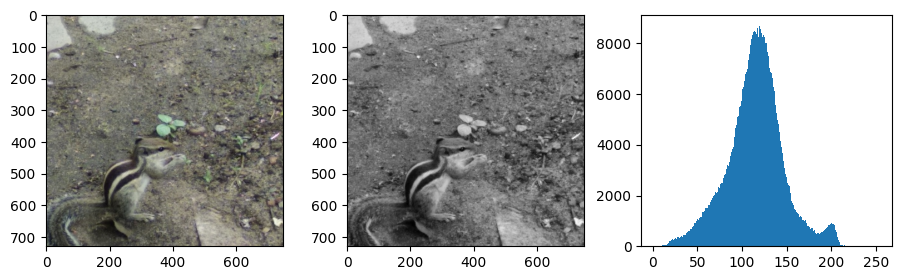

In [34]:
# *** TODO_1 ***

#OPEN THE IMAGE 
img = imread(img_dir + "squirrel.jpg")

#plt.imshow(img)
#CONVERT TO GRAY SCALE 
#(HINT:be sure the gray image is uint8 in the range [0..255])

gray = img_as_ubyte(rgb2gray(img))
#gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gray)

#USING THE SUBPLOT FUNCION TO VISUALIZE THE RGB IMAGE, THE GRAY LEVEL IMAGE AND ITS HISTOGRAM
plt.figure(figsize=(11,3)) 
plt.subplot(1,3,1)
plt.imshow(img) 

plt.subplot(1,3,2)
plt.imshow(gray, cmap="gray")

plt.subplot(1,3,3)
plt.hist(gray.ravel(), bins = 256, range = (0,255))

plt.show()

Text(0.5, 1.0, 'Histogram of the gray values')

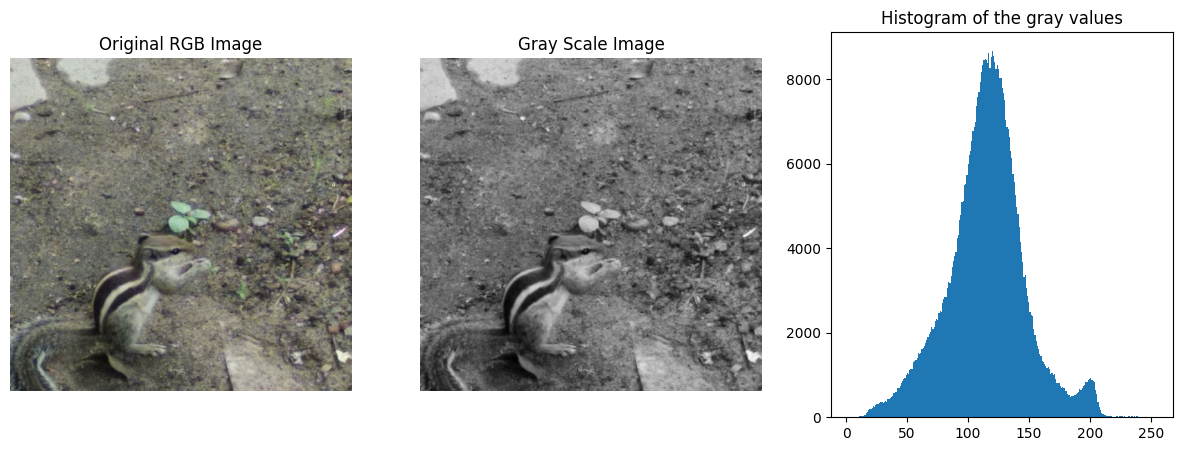

In [14]:
#SOLUTION TO  *** TODO_1 ***

#OPEN THE IMAGE
imgRGB = imread(img_dir + 'squirrel.jpg' ) 

#CONVERT TO gray levels
imgGray = rgb2gray(imgRGB)
imgGray = img_as_ubyte(imgGray)
 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Original RGB Image')
plt.imshow(imgRGB)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(imgGray, cmap= 'gray')
plt.axis('off')
plt.title('Gray Scale Image')

#PLOT THE HISTOGRAM OF THE GRAY LEVEL IMAGE
plt.subplot(1,3,3)
plt.hist(imgGray.ravel(), bins=256, range=(0, 255))  
plt.title('Histogram of the gray values')

# 2. Contrast stretching

  - applica il contrast stretchcing che preferisci all'immagine a colori, in modo da mappare l'input nel range che va dal 5-percentile fino al 95-percentile nel range di output 0-255
  - con la funzione subplot visualizza affiancandole l'immagine originale e quella contrastata

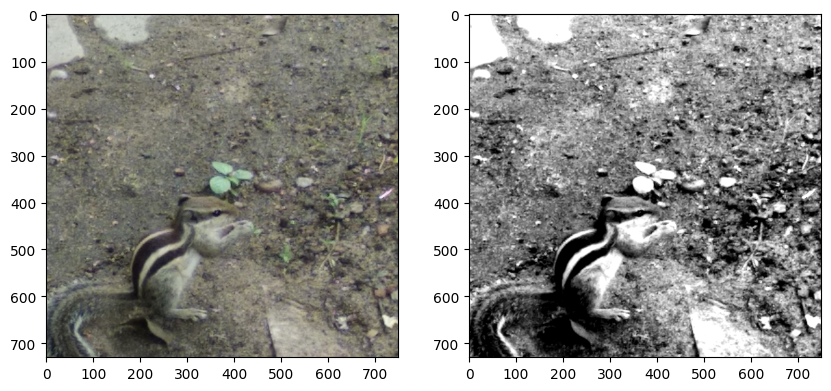

In [56]:
low = np.percentile(img, 5)
high = np.percentile(img, 95)
x = range(256)

xp = [0, low, high, 255]
fp = [0, 0,  255, 255]

table = np.interp(x, xp, fp).astype("uint8")
final = cv2.LUT(gray, table)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(img)

plt.subplot(2,2,2)
plt.imshow(final, cmap = "gray")

#3. SIFT
  - crea l'oggetto SIFT con i seguenti parametri:
    - nfeautures=0
    - nOctaveLayers = 2, 
    - contrastThreshold = 0.2, 
    - edgeThreshold = 10, 
    - sigma = 6
  - applicalo all'immagine corretta con il contrast stretching
  - visualizza opporutnamente i key point trovati
  - stampa quanti key point sono stati trovati

Detected keypoints: 60


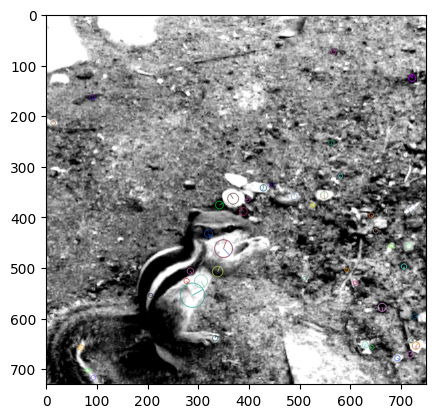

In [75]:
sift = cv2.SIFT_create(nfeatures = 0, nOctaveLayers = 2, contrastThreshold = 0.2, edgeThreshold = 10, sigma = 6)

kp  = sift.detect(final, None)

imgKP=cv2.drawKeypoints(final,kp,final,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(imgKP, cmap = "gray", vmin = 0, vmax = 255)

print("Detected keypoints: " +str(len(kp)))